# <center>TP Geoloc IoT</center> <br>
<center><img src='https://media.giphy.com/media/m9Vsxp3Pbk0Bq/giphy.gif'></center>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import vincenty


# Load Data 

In [2]:
# load train and test data
df_mess_train = pd.read_csv('mess_train_list.csv')
df_mess_test = pd.read_csv('mess_test_list.csv')
pos_train = pd.read_csv('pos_train_list.csv')

In [3]:
# Passage des colonnes en valeurs numériques
cols = ['bsid', 'did', 'nseq', 'rssi', 'time_ux', 'bs_lat', 'bs_lng']
df_mess_train[cols] = df_mess_train[cols].apply(pd.to_numeric)

df_mess_train.describe()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
count,39250.000000,3.925000e+04,39250.000000,39250.000000,3.925000e+04,39250.000000,39250.000000
mean,4533.774752,4.835932e+05,1.043541,-125.863580,1.473368e+12,42.554998,-100.969685
std,2570.495638,9.893140e+04,0.563540,9.226500,5.506910e+09,7.722787,11.522732
min,879.000000,4.732880e+05,0.000000,-155.000000,1.463546e+12,36.053394,-107.463146
25%,2790.000000,4.761230e+05,1.000000,-132.500000,1.468410e+12,39.747448,-105.074287
50%,3559.000000,4.763150e+05,1.000000,-127.333333,1.473444e+12,39.793585,-105.043685
75%,7456.000000,4.766090e+05,1.500000,-121.000000,1.479118e+12,39.838740,-104.998429
max,11951.000000,1.747448e+06,2.000000,-64.000000,1.481143e+12,64.300000,-68.500000


In [4]:
# Passage des colonnes en valeurs numériques
pos_train[['lat', 'lng']] = pos_train[['lat', 'lng']].apply(pd.to_numeric)

pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [5]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [6]:
len(listOfBs)

259

In [7]:
# Passage des colonnes en valeurs numériques
cols = ['bsid', 'did', 'nseq', 'rssi', 'time_ux', 'bs_lat', 'bs_lng']
df_mess_test[cols] = df_mess_test[cols].apply(pd.to_numeric)

df_mess_test.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573be2503e952e191262c351,3578,116539.0,2.0,-111.0,1.463542e+12,39.728651,-105.163032
1,573c05f83e952e1912758013,2617,472504.0,0.0,-136.0,1.463551e+12,39.779908,-105.062479
2,573c05f83e952e1912758013,3556,472504.0,0.0,-127.0,1.463551e+12,39.780658,-105.053676
3,573c05f83e952e1912758013,3578,472504.0,0.0,-129.0,1.463551e+12,39.728651,-105.163032
4,573c05f83e952e1912758013,4058,472504.0,0.0,-105.0,1.463551e+12,39.783211,-105.088747


# Data Exploration

In [8]:
df_train = df_mess_train.copy()
df_train[['lat', 'lng']] = pos_train

#Convert cols to float
cols = ['lat', 'lng', 'bs_lat', 'bs_lng']
df_train[cols] = df_train[cols].apply(pd.to_numeric)

df_train[cols].head()

,lat,lng,bs_lat,bs_lng
0,39.606690,-104.958490,39.617794,-104.954917
1,39.606690,-104.958490,39.677251,-104.952721
2,39.637741,-104.958554,39.612745,-105.008827
3,39.730417,-104.968940,39.797969,-105.073460
4,39.730417,-104.968940,39.723151,-104.956216


In [9]:
df_train[['bs_lat', 'bs_lng']].values

array([[  39.61779376, -104.95491706],
       [  39.67725103, -104.95272051],
       [  39.61274458, -105.00882658],
       ...,
       [  39.75939551, -105.00141507],
       [  39.89887198, -105.15383216],
       [  39.92843618, -105.17271869]])

In [10]:
#Add column dist

def vinc(row):
    return (vincenty(row[['bs_lat', 'bs_lng']], row[['lat', 'lng']])).km

df_train['dist'] = df_train.apply (lambda row: vinc(row),axis=1)

df_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng,dist
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917,39.606690,-104.958490,1.270478
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721,39.606690,-104.958490,7.849924
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827,39.637741,-104.958554,5.131578
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460,39.730417,-104.968940,11.681759
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216,39.730417,-104.968940,1.356862


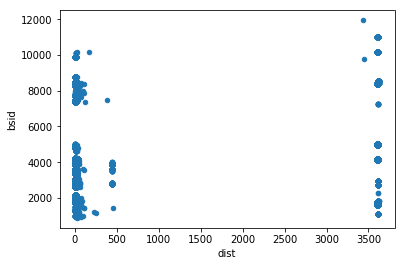

In [11]:
df_train.plot.scatter(x = "dist", y="bsid")
plt.show()

<center>Ici, on observe des messages pour lesquels un bsid (une station) a reçu le message à 500km ou à 3500km : <strong>il s'agit de points aberrants.</strong> <br> <br>
<strong>Dans la suite, nous essayerons d'analyser les stations en question et determiner si elles sont defectueuses</strong></center>

In [12]:
# Curseur de distance max
distMax = 50

count = df_train.groupby('bsid')['dist'].count()
sup = df_train.groupby('bsid')['dist'].apply(lambda x: (x > distMax).sum())

In [13]:
# Comparaison entre le nombre de messages reçus par une station et le nombre de messages dont la distance calculée est aberrente

comparaison = pd.DataFrame([count, sup], index = ["count", "nbSup"]).T
comparaison['bsid'] = comparaison.index
comparaison[["count", "nbSup"]].head(10)

,count,nbSup
bsid,,
879,1,0
911,1,0
921,1,0
944,3,1
980,8,1
1012,85,0
1086,67,0
1092,32,32
1120,1,0


In [14]:
# Liste des 'bsid' dont le Nbre de distances aberrentes représente + de X% du nbre total de messages reçus
#     --> Ces stations sont considérées comme deffectueuses et doives être supprimées

ratioMax = 0.1
bsidToShift = comparaison[comparaison['nbSup'] >= ratioMax * comparaison['count']]['bsid'].values

bsidToShift

array([  944,   980,  1092,  1148,  1156,  1187,  1235,  1443,  1447,
        1463,  1594,  1661,  1730,  1743,  1772,  1796,  1852,  1854,
        1971,  2293,  2611,  2707,  2780,  2800,  2803,  2808,  2849,
        2855,  2943,  3501,  3549,  3630,  3646,  3848,  3933,  4013,
        4123,  4129,  4156,  4959,  4987,  4993,  7248,  7378,  7508,
        7628,  7849,  7857,  7986,  8242,  8355,  8405,  8442,  8449,
        8451,  8560,  9784, 10148, 10151, 10162, 10999, 11007, 11951])

In [15]:
len(df_train['bsid'].unique())

251

# Data Cleaning

## Lorem ipsum

In [16]:
df = df_mess_train.copy()
df[['lat', 'lng']] = pos_train

df.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917,39.606690,-104.958490
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721,39.606690,-104.958490
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827,39.637741,-104.958554
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460,39.730417,-104.968940
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216,39.730417,-104.968940


In [17]:
# Get indexes to delete
df_toShift = df[df['bsid'].isin(bsidToShift)]
df_toShift.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng
5106,57617e1ef0fe6e0c9fd6eb06,8355,476606.0,1.5,-106.5,1.466007e+12,64.3,-68.5,39.778694,-104.977050
5118,576180cf3e952e04b3b41e5c,8355,476512.0,0.5,-111.5,1.466008e+12,64.3,-68.5,39.783396,-104.999821
5179,5761a161f0fe6e0c9fec42b9,8355,473683.0,0.0,-126.0,1.466016e+12,64.3,-68.5,39.803407,-105.019300
5216,57623817864fce5689ec33af,8355,473683.0,0.5,-127.0,1.466055e+12,64.3,-68.5,39.803738,-105.018997
5416,5763734c864fce5689a422f3,8355,476600.0,1.5,-123.0,1.466135e+12,64.3,-68.5,39.803101,-105.023292


In [18]:
df_toShift_grouped = df_toShift.groupby('bsid')

In [19]:
newCoord_lat = {}
newCoord_lng = {}

for key, elmt in df_toShift_grouped:
    newCoord_lat[key] = elmt['lat'].values.mean()
    newCoord_lng[key] = elmt['lng'].values.mean()

In [20]:
#newCoord_lng

In [21]:
def process_row(row):
    row_copy = row.copy()
    if row['bsid'] in bsidToShift :
        row_copy['bs_lat'] = newCoord_lat[row['bsid']]
        row_copy['bs_lng'] = newCoord_lng[row['bsid']]
    return row_copy

df = df.apply(process_row, axis=1)

In [22]:
df[df['bsid'].isin(bsidToShift)].head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng
5106,57617e1ef0fe6e0c9fd6eb06,8355,476606.0,1.5,-106.5,1.466007e+12,39.751051,-105.013546,39.778694,-104.977050
5118,576180cf3e952e04b3b41e5c,8355,476512.0,0.5,-111.5,1.466008e+12,39.751051,-105.013546,39.783396,-104.999821
5179,5761a161f0fe6e0c9fec42b9,8355,473683.0,0.0,-126.0,1.466016e+12,39.751051,-105.013546,39.803407,-105.019300
5216,57623817864fce5689ec33af,8355,473683.0,0.5,-127.0,1.466055e+12,39.751051,-105.013546,39.803738,-105.018997
5416,5763734c864fce5689a422f3,8355,476600.0,1.5,-123.0,1.466135e+12,39.751051,-105.013546,39.803101,-105.023292


In [23]:
df = df.drop(['lat', 'lng'], axis = 1)

In [24]:
df.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


In [25]:
df_mess_train = df.copy()
df_mess_train.shape

(39250, 8)

In [26]:
df_mess_train[df_mess_train['bsid'].isin(bsidToShift)].head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
5106,57617e1ef0fe6e0c9fd6eb06,8355,476606.0,1.5,-106.5,1.466007e+12,39.751051,-105.013546
5118,576180cf3e952e04b3b41e5c,8355,476512.0,0.5,-111.5,1.466008e+12,39.751051,-105.013546
5179,5761a161f0fe6e0c9fec42b9,8355,473683.0,0.0,-126.0,1.466016e+12,39.751051,-105.013546
5216,57623817864fce5689ec33af,8355,473683.0,0.5,-127.0,1.466055e+12,39.751051,-105.013546
5416,5763734c864fce5689a422f3,8355,476600.0,1.5,-123.0,1.466135e+12,39.751051,-105.013546


# Feature Engineering 

## Fonctions 

### 0 ou lat

In [27]:
# Maxtrice de 0 ou lat (mess recu par la bsid )

def lat_mat_const(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess
    indexes = []

    for key, elmt in df_mess_bs_group:
        indexes.append(key)
        df_feat.loc[idx,elmt['bsid']] = elmt["bs_lat"].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, indexes # add id value of each message for the correspondance to message  

### 0 ou lng

In [28]:
# Maxtrice de 0 ou lng (mess recu par la bsid )

def lng_mat_const(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_feat.loc[idx,elmt['bsid']] = elmt["bs_lng"].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

### rssi

In [29]:
# Maxtrice de 0 ou rssi (mess recu par la bsid )

def rssi_mat_const(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_feat.loc[idx,elmt['bsid']] = - elmt['rssi'].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

### nseq

In [33]:
def nseq_mat_const(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_feat.loc[idx,elmt['bsid']] = elmt['nseq'].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

### device id 

In [34]:
# Maxtrice de 0 ou 1 (mess recu par la bsid )

def did_mat_const(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,1)), columns = ['did']) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_feat.loc[idx,'did'] = elmt['did'].mean()
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [27]:
#df_feat_lat, id_list = lat_mat_const(df_mess_train, listOfBs)
#indexes = df_feat_lat.columns.values

In [28]:
#df_feat_lng, id_list = lng_mat_const(df_mess_train, listOfBs)

In [29]:
#df_rssi, id_list = rssi_mat_const(df_mess_train, listOfBs)

In [30]:
#df_nseq, id_list = nseq_mat_const(df_mess_train, listOfBs)

In [31]:
#df_did, id_list = did_mat_const(df_mess_train, listOfBs)

## New Features Engineering

In [ ]:
# Maxtrice de 0 ou lat (mess recu par la bsid )

def features_lat_V2(df_mess_train, listOfBs):
    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess
    indexes = []

    for key, elmt in df_mess_bs_group:
        indexes.append(key)
        df_feat.loc[idx,elmt['bsid']] = elmt["bs_lat"].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, indexes # add id value of each message for the correspondance to message  

## Création de la matrice des features 

In [48]:
def features_lat(df_feat_lat, df_rssi, df_nseq, df_did, indexes):
    df = df_feat_lat.copy()
    
    indx = indexes
    for i in range(len(indx)) :
        df['rssi'+str(indx[i])] = df_rssi[indx[i]]
        df['nseq'+str(indx[i])] = df_nseq[indx[i]]
        
    df['did'] = df_did['did']
    
    return df, indexes

In [49]:
def features_lng(df_feat_lng, df_rssi, df_nseq, df_did, indexes):
    df = df_feat_lng.copy()
    
    indx = indexes
    for i in range(len(indx)) :
        df['rssi'+str(indx[i])] = df_rssi[indx[i]]
        df['nseq'+str(indx[i])] = df_nseq[indx[i]]
        
    df['did'] = df_did['did']
    
    return df, indexes

### Train Data 

In [50]:
# LAT

df_feat_lat, id_list_train = features_lat(df_feat_lat, df_rssi, df_nseq, df_did, indexes)
df_feat_lat.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,nseq10151,rssi10162,nseq10162,rssi10999,nseq10999,rssi11007,nseq11007,rssi11951,nseq11951,did
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,39.973995,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.0


In [51]:
df_feat_lat.reset_index()
df_feat_lat.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,nseq10151,rssi10162,nseq10162,rssi10999,nseq10999,rssi11007,nseq11007,rssi11951,nseq11951,did
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,39.973995,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.0


In [52]:
# LNG

df_feat_lng, id_list_train = features_lng(df_feat_lng, df_rssi, df_nseq, df_did, indexes)
df_feat_lng.shape

(6068, 778)

In [53]:
df_feat_lng.reset_index()
df_feat_lng.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,nseq10151,rssi10162,nseq10162,rssi10999,nseq10999,rssi11007,nseq11007,rssi11951,nseq11951,did
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-104.891717,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.0


### Validation Data

In [54]:
# LAT

df_validation_lat, id_list_test = features_lat(df_feat_lat, df_rssi, df_nseq, df_did, indexes)
df_validation_lat.shape

(6068, 778)

In [55]:
df_validation_lat.reset_index()
df_validation_lat.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,nseq10151,rssi10162,nseq10162,rssi10999,nseq10999,rssi11007,nseq11007,rssi11951,nseq11951,did
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,39.973995,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.0


In [56]:
# LNG

df_validation_lng, id_list_test = features_lng(df_feat_lng, df_rssi, df_nseq, df_did, indexes)
df_validation_lng.shape

(6068, 778)

In [57]:
df_validation_lng.reset_index()
df_validation_lng.head(5)

,879,911,921,944,980,1012,1086,1092,1120,1131,...,nseq10151,rssi10162,nseq10162,rssi10999,nseq10999,rssi11007,nseq11007,rssi11951,nseq11951,did
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473335.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-104.891717,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.0


## Création Matrice des Y (ground_truth) 

In [58]:
# ground truth construction
def ground_truth_train(df_mess_train, pos_train):

    df_mess_pos = df_mess_train.copy()
    df_mess_pos[['lat', 'lng']] = pos_train

    ground_truth_lat = np.array(df_mess_pos.groupby(['messid']).mean()['lat'])
    ground_truth_lng = np.array(df_mess_pos.groupby(['messid']).mean()['lng'])
    
    return ground_truth_lat, ground_truth_lng

In [59]:
ground_truth_lat, ground_truth_lng = ground_truth_train(df_mess_train, pos_train)
ground_truth_lat.shape

(6068,)

# Train / Test split

In [288]:
#from sklearn.model_selection import train_test_split

#X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(df_feat_lat, ground_truth_lat, \
#                                                                    test_size=0.1, random_state=42)
#X_train_lng, X_test_lng, y_train_lng, y_test_lng = train_test_split(df_feat_lng, ground_truth_lng, \
#                                                                    test_size=0.1, random_state=42)

In [60]:
from sklearn.model_selection import train_test_split

def trainTestSplit(X, Y, testSize, seed):
    
    df = X.copy()
    df['Y'] = Y
    
    did = df['did'].unique()
    did_train, did_test = train_test_split(did, test_size = testSize, random_state = seed)
    
    Y_train, Y_test = df[df['did'].isin(did_train)]['Y'], df[df['did'].isin(did_test)]['Y']
    df = df.drop('Y', axis = 1)
    
    X_train, X_test = df[df['did'].isin(did_train)], df[df['did'].isin(did_test)]
    X_train, X_test = X_train.drop('did', axis = 1), X_test.drop('did', axis = 1)
    
    return X_train, X_test, Y_train, Y_test

In [174]:
X_train_lat, X_test_lat, y_train_lat, y_test_lat = trainTestSplit(df_feat_lat, ground_truth_lat, \
                                                         testSize = 0.1, seed = 42)
X_train_lng, X_test_lng, y_train_lng, y_test_lng = trainTestSplit(df_feat_lng, ground_truth_lng, \
                                                         testSize = 0.1, seed = 42)

In [61]:
from sklearn.preprocessing import StandardScaler

def split(X, Y, nbOfSplit, seed):
    scaler = StandardScaler()
    np.random.seed(seed)
    
    df = X.copy()
    df['Y'] = Y
    
    
    did = df['did'].unique()
    np.random.shuffle(did)
    did_splits= np.array_split(did, nbOfSplit)
    
    df.reset_index(drop=True, inplace = True)

    splits = []
    for split in did_splits:
        Y = df[df['did'].isin(split)]['Y']

        X = df[df['did'].isin(split)]
        X = X.drop(['did', 'Y'], axis = 1)
        
        indexToLeave = X.index.values
        others = np.array( list(set(df.index.values) - set(indexToLeave)) )
        
        splits.append((others, indexToLeave))
        
    Y = df['Y']
    X = df.drop(['Y','did'], axis = 1)
    
    X = pd.DataFrame(scaler.fit_transform(X,Y))
    
    return X, Y, splits

# Modelisation

In [62]:
def regressor_and_predict(X_train_lat, X_test_lat, y_train_lat, X_train_lng, X_test_lng, y_train_lng):
    
    # train regressor and make prediction in the train set
    # Input: df_feat, ground_truth_lat, ground_truth_lng, df_test
    # Output: y_pred_lat, y_pred_lng

    from sklearn import linear_model
    # lat
    reg_lat = linear_model.LinearRegression()

    reg_lat.fit(X_train_lat, y_train_lat)
    y_pred_lat = reg_lat.predict(X_test_lat) 
    
    #lng
    reg_lng = linear_model.LinearRegression()

    reg_lng.fit(X_train_lng, y_train_lng)
    y_pred_lng = reg_lng.predict(X_test_lng) 
    
    return y_pred_lat, y_pred_lng


In [63]:
def rf_and_predict(X_train_lat, X_test_lat, y_train_lat, X_train_lng, X_test_lng, y_train_lng):
    
    # train regressor and make prediction in the train set
    # Input: df_feat, ground_truth_lat, ground_truth_lng, df_test
    # Output: y_pred_lat, y_pred_lng

    from sklearn.ensemble import RandomForestRegressor
    # lat
    rf_lat = RandomForestRegressor(n_estimators = 100, random_state = 1)

    rf_lat.fit(X_train_lat, y_train_lat)
    y_pred_lat = rf_lat.predict(X_test_lat)
    
    #lng
    rf_lng = RandomForestRegressor(n_estimators = 100, random_state = 1)

    rf_lng.fit(X_train_lng, y_train_lng)
    y_pred_lng = rf_lng.predict(X_test_lng)
    
    return y_pred_lat, y_pred_lng

## Predictions 

In [64]:
# Make regressor and prediction using the train set

y_pred_lat, y_pred_lng = rf_and_predict(X_train_lat, X_test_lat, y_train_lat, \
                                        X_train_lng, X_test_lng, y_train_lng)

NameError: name 'X_train_lat' is not defined

In [485]:
#y_pred_lat

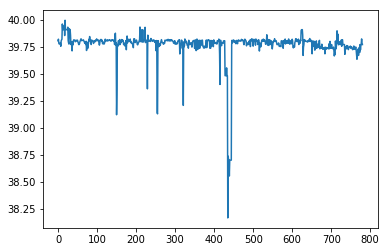

In [486]:
y_pred_lat[np.where(y_pred_lat>90)[0]]= y_pred_lat.mean()
y_pred_lat[np.where(y_pred_lat<-90)[0]]= y_pred_lat.mean()

plt.plot(y_pred_lat)

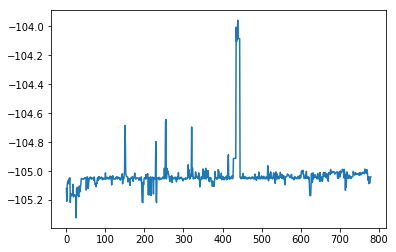

In [487]:
plt.plot(y_pred_lng)

## Cross validation

In [65]:
from sklearn.model_selection import cross_val_predict

In [66]:
def CrossValPredict_RF(X_lat, Y_lat, X_lng, Y_lng, splits_lat, splits_lng):
    from sklearn.ensemble import RandomForestRegressor

    rf_lat = RandomForestRegressor(n_estimators = 100, random_state = 1)
    y_pred_lat = cross_val_predict(rf_lat, X_lat, Y_lat, cv = splits_lat, n_jobs = -1)


    rf_lng = RandomForestRegressor(n_estimators = 100, random_state = 1)
    y_pred_lng = cross_val_predict(rf_lng, X_lng, Y_lng, cv = splits_lng, n_jobs = -1)
    
    return y_pred_lat, y_pred_lng

In [67]:
def CrossValPredict_ET(X_lat, Y_lat, X_lng, Y_lng, splits_lat, splits_lng) :    
    from sklearn.ensemble import ExtraTreesRegressor

    rf_lat = ExtraTreesRegressor(n_estimators = 100, random_state = 1)
    y_pred_lat = cross_val_predict(rf_lat, X_lat, Y_lat, cv = splits_lat, n_jobs = -1)


    rf_lng = ExtraTreesRegressor(n_estimators = 100, random_state = 1)
    y_pred_lng = cross_val_predict(rf_lng, X_lng, Y_lng, cv = splits_lng, n_jobs = -1)
    
    return y_pred_lat, y_pred_lng

In [68]:
def CrossValPredict_GB(X_lat, Y_lat, X_lng, Y_lng, splits_lat, splits_lng):
    from sklearn.ensemble import GradientBoostingRegressor

    rf_lat = GradientBoostingRegressor(n_estimators = 500, random_state = 1)
    y_pred_lat = cross_val_predict(rf_lat, X_lat, Y_lat, cv = splits_lat, n_jobs = -1)


    rf_lng = GradientBoostingRegressor(n_estimators = 500, random_state = 1)
    y_pred_lng = cross_val_predict(rf_lng, X_lng, Y_lng, cv = splits_lng, n_jobs = -1)
    
    return y_pred_lat, y_pred_lng

# Evaluation des Résultats

In [69]:
def vincenty_vec(vec_coord):
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] !=  4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [vincenty(vec_coord[m,0:2],vec_coord[m,2:]).meters for m in range(vec_coord.shape[0])]
    return vin_vec_dist

In [70]:
# evaluate distance error for each predicted point
def Eval_geoloc(y_train_lat , y_train_lng, y_pred_lat, y_pred_lng):
    vec_coord = np.array([y_train_lat , y_train_lng, y_pred_lat, y_pred_lng])
    err_vec = vincenty_vec(np.transpose(vec_coord))
    
    return err_vec

## Train Test

In [494]:
print(y_test_lat.shape)
print(y_test_lng.shape)
print(y_pred_lat.shape)
print(y_pred_lng.shape)

(781,)
(781,)
(781,)
(781,)


In [497]:
err_vec = Eval_geoloc(y_test_lat, y_test_lng, y_pred_lat, y_pred_lng)

## Crossval

In [71]:
X_lat, Y_lat, splits_lat = split(df_feat_lat, ground_truth_lat, nbOfSplit=10, seed = 1)
X_lng, Y_lng, splits_lng = split(df_feat_lng, ground_truth_lng, nbOfSplit=10, seed = 1)

In [72]:
X_lat.head()

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
0,-0.012838,-0.012838,-0.012838,-0.022241,-0.036334,-0.119193,-0.105664,-0.072812,-0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
1,-0.012838,-0.012838,-0.012838,-0.022241,-0.036334,-0.119193,-0.105664,-0.072812,-0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
2,-0.012838,-0.012838,-0.012838,-0.022241,-0.036334,-0.119193,-0.105664,-0.072812,-0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
3,-0.012838,-0.012838,-0.012838,-0.022241,-0.036334,-0.119193,-0.105664,-0.072812,-0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
4,-0.012838,-0.012838,-0.012838,-0.022241,-0.036334,-0.119193,9.463993,-0.072812,-0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838


In [73]:
X_lng.head()

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
0,0.012838,0.012838,0.012838,0.022241,0.036334,0.119193,0.105664,0.072812,0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
1,0.012838,0.012838,0.012838,0.022241,0.036334,0.119193,0.105664,0.072812,0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
2,0.012838,0.012838,0.012838,0.022241,0.036334,0.119193,0.105664,0.072812,0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
3,0.012838,0.012838,0.012838,0.022241,0.036334,0.119193,0.105664,0.072812,0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838
4,0.012838,0.012838,0.012838,0.022241,0.036334,0.119193,-9.463993,0.072812,0.012838,0.0,...,-0.240411,-0.204977,-0.329621,-0.283139,-0.012838,-0.012838,-0.217278,-0.187936,-0.012838,-0.012838


In [74]:
###############################################################################
############ VALENTIN C'EST ICI QUE TU METS TON CODE <3 #######################
###############################################################################


# - - - - Exemple - - - - - -
y_pred_lat, y_pred_lng = CrossValPredict_RF(X_lat, Y_lat, X_lng, Y_lng, splits_lat, splits_lat)

In [75]:
print(ground_truth_lat.shape)
print(ground_truth_lng.shape)
print(y_pred_lat.shape)
print(y_pred_lng.shape)

(6068,)
(6068,)
(6068,)
(6068,)


In [76]:
err_vec = Eval_geoloc(ground_truth_lat, ground_truth_lng, y_pred_lat, y_pred_lng)

In [105]:
#Xtrain_lat = X_lat.loc[splits_lat[5][0],:]
#Ytrain_lat = Y_lat[splits_lat[5][0]]

#Xtest_lat = X_lat.loc[splits_lat[5][1],:]
#Ytest_lat = Y_lat[splits_lat[5][1]]

In [106]:
#Xtrain_lng = X_lng.loc[splits_lng[5][0],:]
#Ytrain_lng = Y_lng[splits_lng[5][0]]

#Xtest_lng = X_lng.loc[splits_lng[5][1],:]
#Ytest_lng = Y_lng[splits_lng[5][1]]

In [107]:
#y_pred_lat, y_pred_lng = rf_and_predict(Xtrain_lat, Xtest_lat, Ytrain_lat, \
#                                        Xtrain_lng, Xtest_lng, Ytrain_lng)

In [108]:
#err_vec = Eval_geoloc(Ytest_lat, Ytest_lng, y_pred_lat, y_pred_lng)

## Plot error distribution

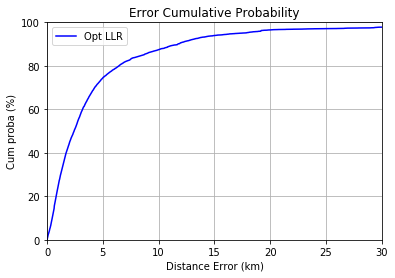

In [77]:
values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1]/1000, cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])
plt.show()

In [81]:
X_lat.describe()

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
count,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6068.0,...,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03,6.068000e+03
mean,-1.064414e-15,-1.072025e-15,-1.074363e-15,-1.244964e-16,-1.351012e-15,7.017705e-15,-2.749851e-16,8.134849e-15,-3.173378e-16,0.0,...,5.269150e-15,-2.961357e-16,-2.520525e-15,1.993644e-15,-4.555239e-16,-4.578498e-16,-3.056892e-15,3.648184e-15,-1.069696e-15,-1.072022e-15
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,0.0,...,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-1.283846e-02,-1.283846e-02,-1.283846e-02,-2.224053e-02,-3.633362e-02,-1.191928e-01,-1.056636e-01,-7.281157e-02,-1.283846e-02,0.0,...,-2.404112e-01,-2.049769e-01,-3.296207e-01,-2.831386e-01,-1.283846e-02,-1.283846e-02,-2.172777e-01,-1.879362e-01,-1.283846e-02,-1.283846e-02
25%,-1.283846e-02,-1.283846e-02,-1.283846e-02,-2.224053e-02,-3.633362e-02,-1.191928e-01,-1.056636e-01,-7.281157e-02,-1.283846e-02,0.0,...,-2.404112e-01,-2.049769e-01,-3.296207e-01,-2.831386e-01,-1.283846e-02,-1.283846e-02,-2.172777e-01,-1.879362e-01,-1.283846e-02,-1.283846e-02
50%,-1.283846e-02,-1.283846e-02,-1.283846e-02,-2.224053e-02,-3.633362e-02,-1.191928e-01,-1.056636e-01,-7.281157e-02,-1.283846e-02,0.0,...,-2.404112e-01,-2.049769e-01,-3.296207e-01,-2.831386e-01,-1.283846e-02,-1.283846e-02,-2.172777e-01,-1.879362e-01,-1.283846e-02,-1.283846e-02
75%,-1.283846e-02,-1.283846e-02,-1.283846e-02,-2.224053e-02,-3.633362e-02,-1.191928e-01,-1.056636e-01,-7.281157e-02,-1.283846e-02,0.0,...,-2.404112e-01,-2.049769e-01,-3.296207e-01,-2.831386e-01,-1.283846e-02,-1.283846e-02,-2.172777e-01,-1.879362e-01,-1.283846e-02,-1.283846e-02
max,7.789095e+01,7.789095e+01,7.789095e+01,4.496295e+01,2.752272e+01,8.389770e+00,9.463993e+00,1.373408e+01,7.789095e+01,0.0,...,4.583408e+00,7.036944e+00,3.375891e+00,5.317791e+00,7.789095e+01,7.789095e+01,5.099070e+00,7.800832e+00,7.789095e+01,7.789095e+01


In [78]:
# Error criterion

np.percentile(err_vec, 80)

6446.68393110744

In [506]:
df = pd.DataFrame(ground_truth_lat, columns = ['lat'])
df['pred_lat'] = y_pred_lat
df['lng'] = ground_truth_lng
df['pred_lng'] = y_pred_lng
df['messid'] = id_list_train

ValueError: Length of values does not match length of index

In [247]:
def vinc2(row):
    return (vincenty(row[['pred_lat', 'pred_lng']], row[['lat', 'lng']])).km

df['dist'] = df.apply (lambda row: vinc2(row),axis=1)

In [250]:
df.describe()

,lat,pred_lat,lng,pred_lng,dist
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,39.803912,39.818242,-105.073649,-105.080117,6.829020
std,0.372732,0.290673,0.288549,0.223599,26.836297
min,35.770683,36.145050,-107.630679,-106.364876,0.002188
25%,39.707212,39.724091,-105.064303,-105.065807,1.033294
50%,39.775599,39.772755,-105.041712,-105.041867,2.427082
75%,39.816718,39.809230,-104.996641,-104.999827,5.142878
max,43.140387,41.558737,-102.094289,-102.376361,514.498433
